# Homework 2 
## Daniel Toribio (100454242)

## Part 1.- Network optimization: Vehicle routing problem

### Introduction

We are in charge of minimizing the total distance traveled by the vans used for delivery in a company.

This is a common problem in logistics and transportation. There are many factors to consider, such as the number of vans, their capacity, the locations of the customers, their demand, and the routes that the vans take.

### Problem description

The company has 3 vans and 15 customers with different demands, in thousands of units. The demand and the location of each client is given in the following table:

| Client | C1 | C2 | C3 | C4 | C5 | C6 | C7 | C8 | C9 | C10 | C11 | C12 | C13 | C14 | C15 |
|--------|----|----|----|----|----|----|----|----|----|-----|-----|-----|-----|-----|-----|
| Demand | 8 | 3 | 7 | 2 | 5 | 5 | 9 | 4 | 6 | 2 | 8 | 1 | 7 | 10 | 10 |
| Location | (-5, 8) | (3, -2)| (0, -6) | (-9, 6) | (2, -7) | (10, -4) | (-1, 9) | (4, -8) | (-6, 5) | (0, -3) | (8, 2) | (-6, 0) | (6, -1)| (5, 8)| (-5, -9)

The capacity of each van is 30 thousands of units, and the vans start the delivery in the warehouse and must finish after the delivery in the warehouse that is located in the coordinates (0,0). 



### Model formulation

#### Sets and parameters

First of all we have to define the data of the problem. 

To define the paths we have to refer to each client with an identifier, and to the warehouse we will be refered with a W. This index can be interpreted as the nodes in the graph.

\begin{equation}
\text{I}=\{W,C1,C2,\dots,C15\}: \text{Identifier for each client and the warehouse.}
\end{equation}

We have to distinguish between the three vans:

\begin{equation}
\text{K}=\{1,2,3\}: \text{Identifier for each van.}
\end{equation}

We have a demand for each client that must be satisfied: 

\begin{equation}
\text{demand}_{i} \in \mathbb{N} : \text{Demand of client i.} \quad \forall \text{i} \in \text{I}\setminus{\text{W}}
\end{equation}

As we are given the locations we can compute a distance matrix to obtain the euclidean distance between each node with all the other nodes. This distance will be the cost that the company wants to minimize:

\begin{equation}
\text{distance}_{i,j} \in \mathbb{R} : \text{Distance between node i and node j.} \quad \forall \text{i,j} \in \text{I}
\end{equation}

#### Decision variables

In this problem we can make decisions in what is going to be the path that each van is going to follow. For this we have to define a binary variable which represents if a path is chosen or not.

\begin{equation}
x_{k,i,j} \in \text{\{0,1\}} : \text{If the van k will go from i to j} \quad \forall \text{i,j} \in \text{I} \quad \forall \text{k} \in \text{K}
\end{equation}


#### Objective Function

In this problem we want to minimize the distance traveled in total by the delivery vans. The objective function can be defined as:

\begin{equation}
\text{Min} : \sum_{i \in \text{I}}\sum_{j \in \text{I}}\sum_{k \in \text{K}}
(\text{distance}_{i,j} \times x_{k,i,j} ) : \text{With i ≠ j} 
\end{equation}

#### Constraints

We have different constraints:

- We have to ensure that if a van travels to a client, then its next travel has to be with that client has begining. This can be seen as the number of times van enters a node is equal to the number of times it leaves that node:

\begin{equation}
\sum_{i \in \text{I}}x_{k,i,j} = \sum_{i\in \text{I}}x_{k,j,i}  \quad \text{With i ≠ j} \quad \forall j \in \text{I} \quad \forall k \in \text{K}
\end{equation}

- We have to ensure that every client is only visited once, to avoid that two different vans deliver to the same client. It is important not considering the warehouse in this constraint because the warehouse is entered and exited 3 times, one per van:

\begin{equation}
\sum_{k \in \text{K}}\sum_{i \in \text{I}}x_{k,i,j} = 1 \quad \text{With i ≠ j} \quad \forall j \in \text{I} \setminus \{\text{W}\} 
\end{equation}

- The vans have to start their paths in the warehouse. Note that as in the first constraint we have said that each node has to be entered and exited the same number of times, we do not have to define a constraint to ensure that the finals nodes of each path is the warehouse:

\begin{equation}
\sum_{j \in \text{I} \setminus \{\text{W}\} }x_{k,W,j} = 1 \quad \text{With i ≠ j} \quad \forall k \in \text{K}
\end{equation}

- The capacity of each van has to be greater or equal to the sum of the demands in the path that it is going to follow, because if not it will not be able to satisfy the demands of all the clients:

\begin{equation}
\sum_{i \in \text{I}}\sum_{j \in \text{I} \setminus \{\text{W}\}}\text{demand}_{j} \times x_{k,i,j} \leq 30 \quad \text{With i ≠ j} \quad \forall k \in \text{K}
\end{equation}


- We need to add MTZ (Miller-Tucker-Zemlin) set of constraints to avoid subtours, which means that we have to add a new variable called u. We have to make some changes to this constraints as this problem is not the same as the TSP. If vehicle k drives from node i to node j, x is going to be 1 and the first constraint can be rewritten to u_j >= u_i + demand_j. This ensure that the value of u_j is at least demand_i more than u_i. If vehicle k does not drive from node i to node j, the constraint is still valid if we take into account the second constraint. 

\begin{equation}
\text{u}_{i} \in \mathbb{N} : \text{Extra variables to remove subtours.} \quad \forall i \in \text{I}
\end{equation}

\begin{equation}
\text{u}_{j} - \text{u}_{i} \geq \text{demand}_{j} - 30 \times (1 - x_{k,i,j}) \quad \forall k \in \text{K}  \quad \forall i,j \in \text{I} \setminus \{\text{W}\} \quad \text{With i ≠ j} 
\end{equation}

\begin{equation}
\text{demand}_{i} \leq \text{u}_{i} \leq 30 \quad \forall i,j \in \text{I} \setminus \{\text{W}\} 
\end{equation}



#### Defining the data

Before creating the model I will define the data of the problem.

In [24]:
import numpy as np
import pandas as pd
from pyomo.environ import *
import itertools

In [25]:
Clients = ["W", "C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15"]
Vans = [1,2,3]

Demand = { "W" : 0,
           "C1": 8 ,
           "C2": 3 ,
           "C3": 7 ,
           "C4": 2 ,
           "C5": 5 ,
           "C6": 5 ,
           "C7": 9 ,
           "C8": 4 ,
           "C9": 6 ,
           "C10": 2 ,
           "C11": 8 ,
           "C12": 1 ,
           "C13": 7 ,
           "C14": 10 ,
           "C15": 10}

Coordinates = [(0,0), (-5, 8), (3, -2), (0, -6), (-9, 6), (2, -7), (10, -4), (-1, 9), (4, -8),
      (-6, 5),  (0, -3),  (8, 2),  (-6, 0),  (6, -1),  (5, 8), (-5, -9)]

def euclidean_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0]) ** 2 + (coord1[1] - coord2[1]) ** 2)

def calculate_distances(coordinates):
    num_coordinates = len(coordinates)
    distances = [[0] * num_coordinates for _ in range(num_coordinates)]

    for i in range(num_coordinates):
        for j in range(i + 1, num_coordinates):
            distance = euclidean_distance(coordinates[i], coordinates[j])
            distances[i][j] = distances[j][i] = distance

    return distances

distances = np.array(calculate_distances(Coordinates))

Distances = {((Clients[i]),(Clients[j])): distances[i][j] for i in range(len(distances)) for j in range(len(distances[0]))}


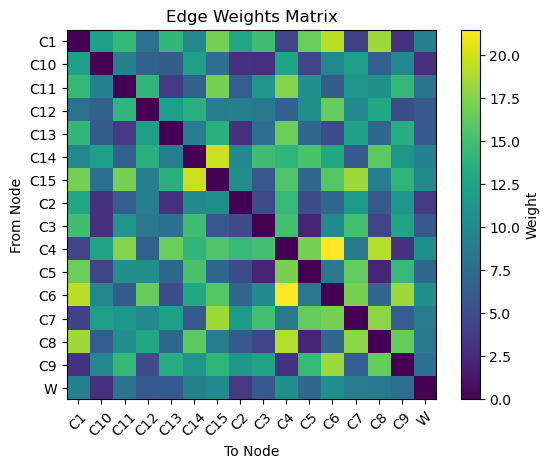

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

# Given data
edges_and_weights =Distances

nodes = sorted(set(node for edge in edges_and_weights.keys() for node in edge))
num_nodes = len(nodes)

# Create an empty matrix
matrix = np.zeros((num_nodes, num_nodes))

# Fill the matrix with edge weights
for i, node1 in enumerate(nodes):
    for j, node2 in enumerate(nodes):
        matrix[i, j] = edges_and_weights.get((node1, node2), 0.0)

# Create a heatmap
plt.imshow(matrix, cmap='viridis', interpolation='nearest')

# Customize the plot
plt.colorbar(label='Weight')
plt.xticks(np.arange(num_nodes), nodes, rotation = 45)
plt.yticks(np.arange(num_nodes), nodes)
plt.title('Edge Weights Matrix')
plt.xlabel('To Node')
plt.ylabel('From Node')

# Display the plot
plt.show()

Now we can see the distance from every node to all the others. From this graph we can see that the clients that are close to the warehouse are C2 and C10, so probably in the solution this two clients could be the ones visited first by the vans. We can also see that traveling from C6 to C4 has the highest distance so probably this path is not going to be considered in the solution. 

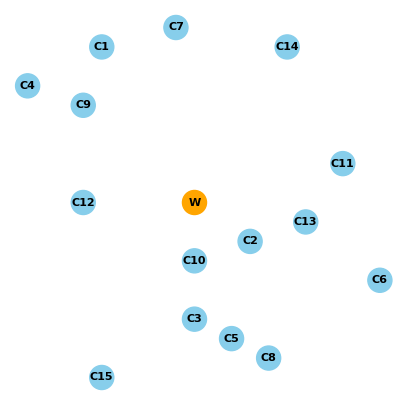

In [27]:

#The warehouse of the company and the clients locations are shown in this picture:

# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos
G.add_nodes_from(["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "W"])
node_colors = ["skyblue", "skyblue", "skyblue", "skyblue", "skyblue", "skyblue", 
               "skyblue", "skyblue", "skyblue", "skyblue", "skyblue", "skyblue",
               "skyblue", "skyblue", "skyblue", "orange"]


# Dibujar el grafo
pos ={"C1": (-5, 8), "C2": (3, -2), "C3": (0, -6), "C4": (-9, 6), "C5": (2, -7), "C6": (10, -4), "C7": (-1, 9), "C8": (4, -8),
      "C9": (-6, 5), "C10": (0, -3), "C11": (8, 2), "C12": (-6, 0), "C13": (6, -1), "C14": (5, 8), "C15": (-5, -9), "W": (0,0)}

# Tamaño personalizado del gráfico
fig, ax = plt.subplots(figsize=(5, 5))

nx.draw(G, pos, with_labels=True, node_size=300, node_color=node_colors, font_size=8, font_color="black", font_weight="bold", arrowsize=10, ax=ax)

# Mostrar el gráfico
plt.show()


Here we can visualize our problem, where W is the warehouse where the vans are starting and ending their delivery paths, and the blue nodes are the clients.

### Model implementation

Once the model is formulated we just need to implement it in pyomo. First, we have to create the model, set the indices and then add to the model the decision variables, the objective function and the constraints.

In [28]:
onlyClients = ["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15"]

model = ConcreteModel("Network model")
model.I = Set(initialize = Clients, doc = "Clients")
model.C = Set(initialize = onlyClients, doc = "onlyClients")
model.K = Set(initialize = Vans, doc = 'Vans')

model.Demand = Param(model.I, initialize = Demand, doc="Demand")
model.Distance = Param(model.I, model.I, initialize = Distances, doc = "Distances")

model.x = Var(model.K, model.I, model.I, doc='Paths of the vans', within=Binary)
model.u = Var(model.I, doc='Remove subtours', within=NonNegativeIntegers)


def objective_rule(model):
    
    return np.sum( model.Distance[i,j] * model.x[k,i,j] for i in model.I for j in model.I if i!=j for k in model.K )

model.obj = Objective(rule=objective_rule, sense=minimize, doc='Total distance')

def C1(model,k,j):
    return np.sum(model.x[k,i,j] for i in model.I) == np.sum(model.x[k,j,i] for i in model.I if i!=j)

model.C1 = Constraint(model.K, model.I, rule=C1, doc='C1')

def C2(model,k,j):
    return np.sum(model.x[k,i,j] for i in model.I if i!=j for k in model.K) == 1

model.C2 = Constraint(model.K, model.C , rule=C2, doc='C2')

def C3(model,k):
    return np.sum(model.x[k,"W",j] for j in model.C ) == 1
model.C3 = Constraint(model.K, rule=C3, doc='C3')

def C4(model,k):
    return np.sum(model.Demand[i] * model.x[k,i,j] for i in model.I for j in model.C if i!=j) <= 30
model.C4 = Constraint(model.K, rule=C4, doc='C4')

def C5(model,k, i, j):
    if (i!=j):
        return (model.u[j]-model.u[i]) >= (model.Demand[j] - 30*(1-model.x[k,i,j]))
    else:
        return Constraint.Skip
model.C5 = Constraint(model.K, model.C, model.C, rule=C5, doc='C5')

def C6(model, i):
    return (model.Demand[i]) <= (model.u[i])
    
model.C6 = Constraint(model.C, rule=C6, doc='C6')

def C7(model, i):
    return  (model.u[i]) <= 30
    
model.C7 = Constraint(model.C, rule=C7, doc='C7')


C:\Users\dtori\AppData\Local\Temp\ipykernel_9660\52892037.py:17: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum( model.Distance[i,j] * model.x[k,i,j] for i in model.I for j in model.I if i!=j for k in model.K )
C:\Users\dtori\AppData\Local\Temp\ipykernel_9660\52892037.py:22: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.x[k,i,j] for i in model.I) == np.sum(model.x[k,j,i] for i in model.I if i!=j)
C:\Users\dtori\AppData\Local\Temp\ipykernel_9660\52892037.py:27: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.x[k,i,j] for i in model.I if i!

Now we solve the problem using Gurobi solver.

In [29]:
Solver = SolverFactory('gurobi')
solution = Solver.solve(model)

### Analysis of the results

In [30]:
model.obj()

99.35764302320744

This is the minimum distance covered by all the vans after visiting all the clients.

In [31]:
path1 = pd.DataFrame()

for i in model.I:
    for j in model.I:
        if isinstance(model.x[1,i,j](), float):
            path1.loc[i,j] = model.x[1,i,j]()
        else:
            path1.loc[i,j] = 0
            
path2 = pd.DataFrame()

for i in model.I:
    for j in model.I:
        if isinstance(model.x[2,i,j](), float):
            path2.loc[i,j] = model.x[2,i,j]()
        else:
            path2.loc[i,j] = 0
            
path3 = pd.DataFrame()

for i in model.I:
    for j in model.I:
        if isinstance(model.x[3,i,j](), float):
            path3.loc[i,j] = model.x[3,i,j]()
        else:
            path3.loc[i,j] = 0

print(path1)


       W   C1   C2   C3   C4   C5   C6   C7   C8   C9  C10  C11  C12  C13  \
W    0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0   
C1   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
C2   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
C3   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
C4   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
C5   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
C6   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0   
C7   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
C8   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
C9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
C10  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
C11  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

This is the solution for the first van path. As it is not easy to interpret the result in this matrix, I will print the paths in the graph.

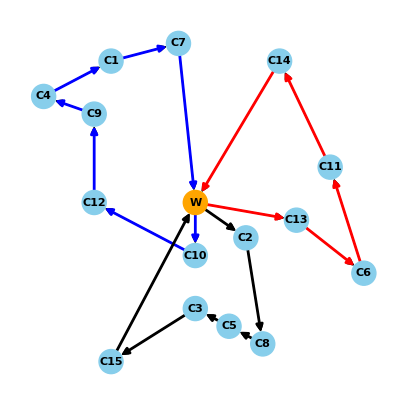

In [32]:
def encontrar_unos(df): #This function is used to obtain the paths (row and column) where there is a 1
    resultados = []

    for index, row in df.iterrows():
        for col in df.columns:
            if row[col] == 1:
                resultados.append((index, col))

    return resultados

resultados1 = encontrar_unos(path1)
resultados2 = encontrar_unos(path2)
resultados3 = encontrar_unos(path3)
# Crear un grafo dirigido
G = nx.DiGraph()

# Agregar nodos
G.add_nodes_from(["C1", "C2", "C3", "C4", "C5", "C6", "C7", "C8", "C9", "C10", "C11", "C12", "C13", "C14", "C15", "W"])
node_colors = ["skyblue", "skyblue", "skyblue", "skyblue", "skyblue", "skyblue", 
               "skyblue", "skyblue", "skyblue", "skyblue", "skyblue", "skyblue",
               "skyblue", "skyblue", "skyblue", "orange"]

G.add_edges_from(resultados1)
G.add_edges_from(resultados2)
G.add_edges_from(resultados3)

# Dibujar el grafo
pos ={"C1": (-5, 8), "C2": (3, -2), "C3": (0, -6), "C4": (-9, 6), "C5": (2, -7), "C6": (10, -4), "C7": (-1, 9), "C8": (4, -8),
      "C9": (-6, 5), "C10": (0, -3), "C11": (8, 2), "C12": (-6, 0), "C13": (6, -1), "C14": (5, 8), "C15": (-5, -9), "W": (0,0)}

# Tamaño personalizado del gráfico
fig, ax = plt.subplots(figsize=(5, 5))


nx.draw(G, pos, with_labels=True, node_size=300, node_color=node_colors, font_size=8, font_color="black", font_weight="bold", arrowsize=10, ax=ax)



# Dibujar bordes
nx.draw_networkx_edges(G, pos, edgelist=resultados1, edge_color="red", width=2.0, ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=resultados2, edge_color="blue", width=2.0, ax=ax)
nx.draw_networkx_edges(G, pos, edgelist=resultados3, edge_color="black", width=2.0, ax=ax)

# Mostrar el gráfico
plt.show()

Now we can see the solution in a graph. Here we can see that each van starts and ends in the warehouse. We can also see that all clients have been visited exactly one time. We can see that the previous beliefs were true, as two of the vans visited first C2 and C10.

In [33]:
keys_to_sum = ["C10", "C12", "C9", "C4", "C1", "C7"]

# Calculate the sum of values for the specified keys
sum_values = sum(Demand[key] for key in keys_to_sum)

print("Sum of first path:", sum_values)

keys_to_sum = ["C2", "C8", "C5", "C3", "C15"]

# Calculate the sum of values for the specified keys
sum_values = sum(Demand[key] for key in keys_to_sum)

print("Sum of second path:", sum_values)

keys_to_sum = ["C13", "C6", "C11", "C14"]

# Calculate the sum of values for the specified keys
sum_values = sum(Demand[key] for key in keys_to_sum)

print("Sum of third path:", sum_values)

Sum of first path: 28
Sum of second path: 29
Sum of third path: 30


We can also see that in all paths the capacity of the van, 30, is enought to satisfy the demand of the clients, but we have to take care because the capacities of the vans are close to the total demand of each path, so if we add a new client, his demand should be very low, at maximum 2, or we have to increase the capacity of the vans.

## Part 2.- Non-linear optimization: Army strategy video game

### Problem description

An Army strategy video game typically involves players taking on the role of a commander or general, with the objective of leading an army to victory when attacking other players. The most important part of these games is the creation of the army, where they must choose between different troops that have a different training cost:

- Barbarian

- Archer

- Giant

- Goblin

- Wizard

- Dragon

- Ballon

- Hog rider

At least one troop of each type has to be used in the army configuration.

The level of each troop is also important as the higher the level the better the troop is but it will need more training:

| <i></i> | Barbarian | Archer | Giant | Goblin | Wizard | Dragon | Ballon | Hog rider |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Level 1 | 1 | 1 | 5 | 1 | 4 | 10 | 5 | 12 |
| Level 2 | 3 | 3 | 8 | 2 | 7 | 15 | 9 | 16 |
| Level 3 | 5 | 5 | 16 | 3 | 12 | 22 | 18 | 24 |
| Level 4 | 8 | 8 | 22 | 4 | 19 | 30 | 24 | 36 |
| Level 5 | 12 | 12 | 32 | 5 | 25 | 40 | 32 | 46 |


There is a maximum of troops we can have in our army, which is of 100 size units, and each troop has a different size:

| <i></i> | Barbarian | Archer | Giant | Goblin | Wizard | Dragon | Ballon | Hog rider |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Size | 3 | 2 | 15 | 1 | 3 | 20 | 10 | 6 |


Each troop is more effective depending on the defensive building that is being attacked. The defensive buildings are:

- Cannon
- Archer tower
- Inferno tower
- Wizard tower
- Mortar

Each player has 12 defensive buildings in total, but they must fulfill that at least there are 3 cannons, 3 archer towers, 2 inferno tower, 1 wizard tower and 1 mortar.

After a lot of hours spent playing this video game we have obtained an approximation of how effective (a value between 1 and 10 where 1 means very ineffective and 10 means very effective) a troop is against a defensive building, and this effectiveness is multiplied by the level of the troop squared:


| <i></i> | Barbarian | Archer | Giant | Goblin | Wizard | Dragon | Ballon | Hog rider |
| --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Cannon | 4 | 2 | 9 | 1 | 1 | 10 | 10 | 8 |
| Archer tower | 5 | 3 | 7 | 1 | 4 | 8 | 3 | 8 |
| Inferno tower | 4 | 3 | 2 | 1 | 3 | 2 | 4 | 9 |
| Wizard tower  | 2 | 1 | 10 | 1 | 2 | 7 | 6 | 9 |
| Mortar | 3 | 1 | 8 | 1 | 1 | 10 | 10 | 10 |

When attacking we can select the player that will be attacked, this means that we can select the defensive configuration we want for our army.

After each attack, the game rewards are obtained by substracting the costs of each troop times the number of troops of that type squared (because the game penalized a lot if the player uses a huge army) to the effectiveness of the attack. Our goal is to maximize the game rewards.

### Model formulation

#### Sets and parameters

First of all we have to define the data of the problem. 

In this case we will need an identifier for each type of troop, for the level of each troop and for the defensive buildings.

\begin{equation}
\text{I}=\{\text{Barbarians},\text{ Archers}, \text{ Giants}, \text{ Goblins}, \text{ Wizard}, \text{ Dragon}, \text{ Ballon}, \text{ Hog rider} \}: \text{Identifier for each type of troop.}
\end{equation}

\begin{equation}
\text{J}=\{\text{Cannon},\text{ Archer tower}, \text{ Inferno tower}, \text{ Wizard tower}, \text{ Mortar}\}: \text{Identifier for the defensive building.}
\end{equation}

\begin{equation}
\text{K}=\{1,2,3,4,5\}: \text{Identifier for the level of a troop.}
\end{equation}

We have the training cost depending on the troop and in its level:

\begin{equation}
\text{cost}_{i,k} \in \mathbb{N} : \text{Training cost of troop of type i with level k.} \quad \forall \text{i} \in \text{I} \quad \forall \text{k} \in \text{K}
\end{equation}

We are also given the effectiveness of each troop depending on the defensive buildings:

\begin{equation}
\text{eff}_{i,j} \in \mathbb{N} : \text{Effectiveness of troop i attacking building j.} \quad \forall \text{i} \in \text{I} \quad \forall \text{j} \in \text{J} 
\end{equation}

We have to define another parameter for the size of each troop, as we have to consider it for the army size limitation:

\begin{equation}
\text{size}_{i} \in \mathbb{N} : \text{Size of troop i.} \quad \forall \text{i} \in \text{I} 
\end{equation}

#### Decision variables

In this problem we can make decisions in the number of troops of type i and level k that we are going to train for our army:

\begin{equation}
x_{i,k} \in \mathbb{N} : \text{Number of troops of type i of level k.} \quad \forall \text{i} \in \text{I} \quad \forall \text{k} \in \text{K} 
\end{equation}

As in this game we can select the player we want to attack, we are able to see his defensive configuration before attacking so we are also making decisions in the amount of defensive buildings of type j.

\begin{equation}
y_{j} \in \mathbb{N} : \text{Number of defensive buildings of type j.} \quad \forall \text{j} \in \text{J} 
\end{equation}


#### Objective Function

In this problem we want to maximize the game rewards, which means that we have to maximize the effectiveness of the attack (the number of troops multiplied by their effectiveness and by the level) minus the cost of each troop times the amount of troops squared (to avoid big armies):

\begin{equation}
\text{Max} : \sum_{i \in \text{I}}\sum_{j \in \text{J}}\sum_{k \in \text{K}}
(x_{i,k} \times \text{eff}_{i,j} \times k^2 \times y_{j} - \text{cost}_{i,k} \times (x_{i,k})^2) 
\end{equation}

#### Constraints

We have different constraints:

- We have to take at least one troop of each type for the army:

\begin{equation}
\sum_{k \in \text{K}}x_{i,k} \geq 1  \quad \forall{i} \in \text{I}
\end{equation}

- We have to consider the maximum size of the army:

\begin{equation}
\sum_{i \in \text{I}} \sum_{k \in \text{K}}\text{size}_{i}\times x_{i,k} \leq 100
\end{equation}

- We have to consider the total number of defensive buildings:

\begin{equation}
\sum_{j \in \text{J}} y_{j} = 12 
\end{equation}

- There is also a minimum number of buildings of each type that have to be in the defensive configuration:

\begin{equation}
y_{\text{Cannon}} \geq 3
\end{equation}

\begin{equation}
y_{\text{Archer tower}} \geq 3
\end{equation}

\begin{equation}
y_{\text{Inferno tower}} \geq 2
\end{equation}

\begin{equation}
y_{\text{Wizard tower}} \geq 1
\end{equation}

\begin{equation}
y_{\text{Mortar}} \geq 1
\end{equation}


#### Defining the data

Before creating the model I will define the data of the problem.

In [34]:
Troops = ["Barbarian", "Archer", "Giant", "Goblin", "Wizard", "Dragon", "Ballon", "Hog rider"]
Levels = [1,2,3,4,5]
Defences = ["Cannon", "Archer tower", "Inferno tower", "Wizard tower", "Mortar"]

Cost = {("Barbarian", 1): 1,
        ("Barbarian", 2): 3,
        ("Barbarian", 3): 5,
        ("Barbarian", 4): 8,
        ("Barbarian", 5): 12,
        ("Archer", 1): 1,
        ("Archer", 2): 3, 
        ("Archer", 3): 5,
        ("Archer", 4): 8,
        ("Archer", 5): 12,
        ("Giant", 1): 5,
        ("Giant", 2): 8,
        ("Giant", 3): 16,
        ("Giant", 4): 22,
        ("Giant", 5): 32,
        ("Goblin", 1): 1,
        ("Goblin", 2): 2,
        ("Goblin", 3): 3,
        ("Goblin", 4): 4,
        ("Goblin", 5): 5,
        ("Wizard", 1): 4,
        ("Wizard", 2): 7,
        ("Wizard", 3): 12,
        ("Wizard", 4): 19, 
        ("Wizard", 5): 25,
        ("Dragon", 1): 10,
        ("Dragon", 2): 15,
        ("Dragon", 3): 22,
        ("Dragon", 4): 30,
        ("Dragon", 5): 40,
        ("Ballon", 1): 5,
        ("Ballon", 2): 9,
        ("Ballon", 3): 18,
        ("Ballon", 4): 24,
        ("Ballon", 5): 32,
        ("Hog rider", 1): 12,
        ("Hog rider", 2): 16,
        ("Hog rider", 3): 24,
        ("Hog rider", 4): 36,
        ("Hog rider", 5): 46}

Size = {"Barbarian" : 3, "Archer" : 2, "Giant" : 15, "Goblin" : 1, "Wizard" : 3, "Dragon" : 20, "Ballon" : 10, "Hog rider" : 6}

Eff =  {("Barbarian", "Cannon"): 4,
        ("Barbarian", "Archer tower"): 5,
        ("Barbarian", "Inferno tower"): 4,
        ("Barbarian", "Wizard tower"): 2,
        ("Barbarian", "Mortar"): 3,
        ("Archer", "Cannon"): 2,
        ("Archer", "Archer tower"): 3, 
        ("Archer", "Inferno tower"): 3,
        ("Archer", "Wizard tower"): 1,
        ("Archer", "Mortar"): 1,
        ("Giant", "Cannon"): 9,
        ("Giant", "Archer tower"): 7,
        ("Giant", "Inferno tower"): 2,
        ("Giant", "Wizard tower"): 10,
        ("Giant", "Mortar"): 8,
        ("Goblin", "Cannon"): 1,
        ("Goblin", "Archer tower"): 1,
        ("Goblin", "Inferno tower"): 1,
        ("Goblin", "Wizard tower"): 1,
        ("Goblin", "Mortar"): 1,
        ("Wizard", "Cannon"): 1,
        ("Wizard", "Archer tower"): 4,
        ("Wizard", "Inferno tower"): 3,
        ("Wizard", "Wizard tower"): 2, 
        ("Wizard", "Mortar"): 1,
        ("Dragon", "Cannon"): 10,
        ("Dragon", "Archer tower"): 8,
        ("Dragon", "Inferno tower"): 2,
        ("Dragon", "Wizard tower"): 7,
        ("Dragon", "Mortar"): 10,
        ("Ballon", "Cannon"): 10,
        ("Ballon", "Archer tower"): 3,
        ("Ballon", "Inferno tower"): 4,
        ("Ballon", "Wizard tower"): 6,
        ("Ballon", "Mortar"): 10,
        ("Hog rider", "Cannon"): 8,
        ("Hog rider", "Archer tower"): 8,
        ("Hog rider", "Inferno tower"): 9,
        ("Hog rider", "Wizard tower"): 9,
        ("Hog rider", "Mortar"): 10}

### Exploratory data analysis

We can make some plots to understand better the data

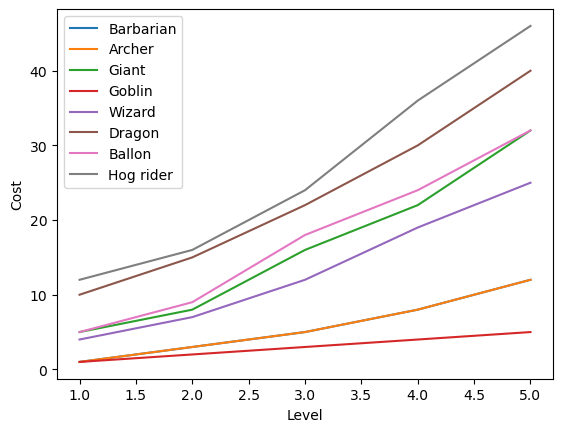

In [35]:
for troop in Troops:
    plt.plot(Levels, [Cost[(troop, level)] for level in Levels], label=troop)
plt.xlabel('Level')
plt.ylabel('Cost')
plt.legend()
plt.show()


We can see that except the goblins, for the rest of troop, their training cost increases exponentially with their level.

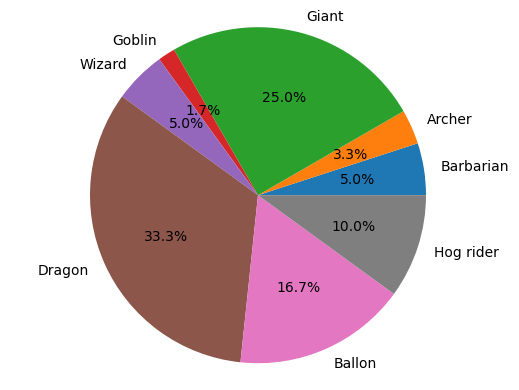

In [36]:
plt.pie(Size.values(), labels=Size.keys(), autopct='%1.1f%%')
plt.axis('equal')  
plt.show()

Here we can see the size of each troop compared to the sum of each troop size, and we can see that the dragon and the giant will fill a lot of the army size. Now I will compute the average effectiveness of each troop and divide it by their cost times their size and multiply the result by the level to obtain the effectiveness of a troop considering its level and its cost.

In [37]:
from collections import defaultdict

# Calculate the average effectiveness for each troop
average_effectiveness = defaultdict(float)
troop_counts = defaultdict(int)

for (troop, defense), value in Eff.items():
    
    average_effectiveness[troop] += value
    troop_counts[troop] += 1
    
for troop in average_effectiveness:
    average_effectiveness[troop] /= troop_counts[troop] 

avg_level = defaultdict(float)
for troop in average_effectiveness:
    for level in Levels:
        avg_level[troop, level] = average_effectiveness[troop] * level**2

# Compute the effectiveness considering level and cost
troop_effectiveness = defaultdict(float)

for (troop,level), value in avg_level.items():
    
    key = (troop, level)
    
    if key in Cost:
        troop_effectiveness[key] = (value) / (Cost[key]*Size[key[0]])
for (troop, level), value in troop_effectiveness.items():
    print(f"{troop} \t level: {level} \t value: {value:.2f}")

Barbarian 	 level: 1 	 value: 1.20
Barbarian 	 level: 2 	 value: 1.60
Barbarian 	 level: 3 	 value: 2.16
Barbarian 	 level: 4 	 value: 2.40
Barbarian 	 level: 5 	 value: 2.50
Archer 	 level: 1 	 value: 1.00
Archer 	 level: 2 	 value: 1.33
Archer 	 level: 3 	 value: 1.80
Archer 	 level: 4 	 value: 2.00
Archer 	 level: 5 	 value: 2.08
Giant 	 level: 1 	 value: 0.10
Giant 	 level: 2 	 value: 0.24
Giant 	 level: 3 	 value: 0.27
Giant 	 level: 4 	 value: 0.35
Giant 	 level: 5 	 value: 0.38
Goblin 	 level: 1 	 value: 1.00
Goblin 	 level: 2 	 value: 2.00
Goblin 	 level: 3 	 value: 3.00
Goblin 	 level: 4 	 value: 4.00
Goblin 	 level: 5 	 value: 5.00
Wizard 	 level: 1 	 value: 0.18
Wizard 	 level: 2 	 value: 0.42
Wizard 	 level: 3 	 value: 0.55
Wizard 	 level: 4 	 value: 0.62
Wizard 	 level: 5 	 value: 0.73
Dragon 	 level: 1 	 value: 0.04
Dragon 	 level: 2 	 value: 0.10
Dragon 	 level: 3 	 value: 0.15
Dragon 	 level: 4 	 value: 0.20
Dragon 	 level: 5 	 value: 0.23
Ballon 	 level: 1 	 value: 0.1

We can see that the troops gives the highest effectiveness considering the cost and the size when they are in the level 5. This will make that the solution of the problem is an army of almost all troops of level 5 and maybe some of them of level 4 as in some cases the value of the level 4 and level 5 are very close. We can see that the goblins have the highest values among all the troops, because as when we are computing this value we are just considering one building of type for the average effectiveness, but in reality we will attack players with more defensive buildings so the goblins will not be as good as they seem to be now.

In [38]:
defense_average = defaultdict(float)
defense_counts = defaultdict(int)

for (troop, defense), value in Eff.items():
    defense_average[defense] += value
    defense_counts[defense] += 1

for defense in defense_average:
    defense_average[defense] /= defense_counts[defense]


for defense, value in defense_average.items():
    print(f"{defense} value: {value:.2f}")


Cannon value: 5.62
Archer tower value: 4.88
Inferno tower value: 3.50
Wizard tower value: 4.75
Mortar value: 5.50


Here we can see the average effectiveness for each building, where we can see that the cannon is the one that gives us more effectiveness. Despite this, our solution may not be attacking players with a lot of cannons as we have to use at least one troop of each type and there are some of them that are bad against cannons.

### Model implementation

Once the model is formulated we just need to implement it in pyomo. First, we have to create the model, set the indices and then add to the model the decision variables, the objective function and the constraints.

In [39]:
model = ConcreteModel("Non linear model")
model.I = Set(initialize = Troops, doc = "Troops")
model.J = Set(initialize = Defences, doc = "Defences")
model.K = Set(initialize = Levels, doc = 'Levels')

model.Cost = Param(model.I, model.K, initialize = Cost, doc="Training costs")
model.Size = Param(model.I, initialize = Size, doc = "Size of the troops")
model.Eff = Param(model.I, model.J, initialize = Eff, doc = "Effectiveness of the troops")

model.x = Var(model.I, model.K, doc='Number of troops', within=NonNegativeIntegers)
model.y = Var(model.J, doc='Number of defences', within=NonNegativeIntegers)

def objective_rule(model):
    
    return np.sum( model.x[i,k] * model.Eff[i,j] * k**2 * model.y[j] - model.Cost[i,k] * (model.x[i,k])**2 for i in model.I for j in model.J for k in model.K)

model.obj = Objective(rule=objective_rule, sense=maximize, doc='Total game rewards')

def C1(model):
    return np.sum(model.Size[i] * model.x[i,k] for i in model.I for k in model.K) <= 100

model.C1 = Constraint(rule=C1, doc='C1')

def C2(model):
    return np.sum(model.y[j] for j in model.J) == 12

model.C2 = Constraint(rule=C2, doc='C2')

def C3(model):
    return model.y["Cannon"] >= 3
model.C3 = Constraint(rule=C3, doc='C3')

def C4(model):
    return model.y["Archer tower"] >= 3
model.C4 = Constraint(rule=C4, doc='C4')

def C5(model):
    return model.y["Inferno tower"] >= 2
model.C5 = Constraint(rule=C5, doc='C5')

def C6(model):
    return model.y["Wizard tower"] >= 1
model.C6 = Constraint(rule=C6, doc='C6')

def C7(model):
    return model.y["Mortar"] >= 1
model.C7 = Constraint(rule=C7, doc='C7')

def C8(model, i):
    return np.sum(model.x[i,k] for k in model.K) >= 1

model.C8 = Constraint(model.I, rule=C8, doc='C8')

C:\Users\dtori\AppData\Local\Temp\ipykernel_9660\2047799485.py:15: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum( model.x[i,k] * model.Eff[i,j] * k**2 * model.y[j] - model.Cost[i,k] * (model.x[i,k])**2 for i in model.I for j in model.J for k in model.K)
C:\Users\dtori\AppData\Local\Temp\ipykernel_9660\2047799485.py:20: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(model.Size[i] * model.x[i,k] for i in model.I for k in model.K) <= 100
C:\Users\dtori\AppData\Local\Temp\ipykernel_9660\2047799485.py:25: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  return np.sum(mo

In [40]:
Solver = SolverFactory('gurobi')

# Obtain the solution
Results = Solver.solve(model)

In [41]:
model.obj.display()

obj : Size=1, Index=None, Active=True
    Key  : Active : Value
    None :   True : 21296.0


We can obtain at maximum a game reward of 21296, but what we are really interested in is in the configuration of the army and of the defence configuration of the player we are attacking.

In [42]:
troops = pd.DataFrame()

for i in model.I:
    for k in model.K:
        if isinstance(model.x[i,k](), float):
            troops.loc[i,k] = model.x[i,k]()
        else:
            troops.loc[i,k] = 0
            
print(troops)

             1    2    3    4    5
Barbarian  0.0  0.0  0.0  2.0  5.0
Archer     0.0  0.0  0.0  0.0  3.0
Giant      0.0  0.0  0.0  0.0  1.0
Goblin     0.0  0.0  0.0  0.0  1.0
Wizard     0.0  0.0  0.0  0.0  1.0
Dragon     0.0  0.0  0.0  0.0  1.0
Ballon     0.0  0.0  0.0  0.0  1.0
Hog rider  0.0  0.0  0.0  1.0  3.0


We can see that the best army configuration is:
- 2 barbarian of level 4
- 5 barbarian of level 5
- 3 archer of level 5
- 1 giant of level 5
- 1 goblin of level 5
- 1 wizard of level 5
- 1 dragon of level 5
- 1 ballon of level 5
- 1 hog rider of level 4
- 3 hog rider of level 5

This configuration makes sense as we have seen before that the best troop considering effectiveness and the cost of training depending on the level is the barbarian, so that is why we have 5 barbarians of level 5. If we have only one unit of a type means that is trained because we need it for the constraint of having at least one troop of each type, but probably if we had not this constraint those units will not be trained and we will train more barbarians of level 5. 

We can also see that in the optimal solution the goblins were not as good as it was thought.

In [43]:
model.y.display()

y : Number of defences
    Size=5, Index=J
    Key           : Lower : Value : Upper : Fixed : Stale : Domain
     Archer tower :     0 :   5.0 :  None : False : False : NonNegativeIntegers
           Cannon :     0 :   3.0 :  None : False : False : NonNegativeIntegers
    Inferno tower :     0 :   2.0 :  None : False : False : NonNegativeIntegers
           Mortar :     0 :   1.0 :  None : False : False : NonNegativeIntegers
     Wizard tower :     0 :   1.0 :  None : False : False : NonNegativeIntegers


The best defense configuration we can attack is the one with 5 archer towers, 3 cannons, 2 inferno tower, 1 mortar, and 1 wizard tower.

We have obtained the best army configuration against a defence configuration that is able to maximize our game rewards, and taking care about the fact that the game penalized a lot the size of our army as it is squared.

## Final conclusions

In the first part of the project I had to solve a Vehicle Rooting Problem with capacities. When I chose this problem, I thought it was similar to the Travelling Salesman Problem but with a number of salesmans, but once I started defining the model I realised that it has a lot of differences. This was because the warehouse node needed different constraints, as it is not visited only once, and also that as there are 3 vans the problem change as each van do not need to visit all the client nodes. I had also to modify the MTZ (Miller-Tucker-Zemlin) set of constraints to avoid subtours. I also had problems at the begining as I was not considering that if the sum of the capacities of the van was not higher than the sum of all the demands the problem was not feasible. At the end I have obtained a good result, that once I draw the graph seems to be correct.

For the second part of the project I tried to make a problem that was original and that the fact that the objective function was non linear made sense. The only problem I had in this part was that gurobi is not able to solve problems of degree higher than 2 because their solution region can be concave. The result of this problem was easy to interpret. 
